# Project: Wrangling and Analyze Data

In [1]:
import tweepy
import json
import pandas as pd
import requests
from io import StringIO
from timeit import default_timer as timer
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
weratedogs = pd.read_csv('twitter-archive-enhanced.csv')
weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
tsv_io = StringIO(response.text)
imagen_pred = pd.read_csv(tsv_io, sep='\t')
imagen_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import json

text_file_path = 'tweet_json.txt'
json_objects = []
 
with open(text_file_path, 'r') as text_file:
    for line in text_file:
        try:
            json_object = json.loads(line)
            json_objects.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
add_data = pd.DataFrame(json_objects)

add_data = add_data[['id','retweet_count','favorite_count','full_text','display_text_range']] # Traigo las variables de importancia para mi análisis
add_data.head()

,id,retweet_count,favorite_count,full_text,display_text_range
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"[0, 138]"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



> Based on the data gathering process, the following outcomes were achieved:

>- **weratedogs:** Information was collected from the Twitter account @WeRateDogs using the 'twitter-archive-enhanced.csv' source.
>- **image_pred:** Information associated with tweet image predictions was obtained.
>- **add_data:** Additional data was extracted with the support of the Twitter API.

### Quality issues
**1.** The data in the timestamp variable of the weratedogs dataframe is in object format when it should be in date format. In addition, dates have an additional character ' +0000'. Example: '2017-08-01 16:23:56 +0000'.

In [5]:
print(f'timestamp variable format type: {weratedogs.timestamp.dtype}')
print(f'example: {weratedogs.timestamp[0]}')

timestamp variable format type: object
example: 2017-08-01 16:23:56 +0000


**2.** The weratedogs dataframe has 181 records associated with retweets, which are not valid according to the indication of the problem.

In [6]:
print(f'total not null info in retweeted_status_id: {weratedogs.retweeted_status_id.count()}')

total not null info in retweeted_status_id: 181


**3.** weratedogs in its expanded_urls field, where it contains the urls of the tweets, has 79 urls that appear in two tweets (maybe because of the retweets).

In [7]:
print(f'Distribution of urls which appear once or twice in different tweets:')
print(weratedogs['expanded_urls'].value_counts().value_counts())

Distribution of urls which appear once or twice in different tweets:
count
1    2139
2      79
Name: count, dtype: int64


**4.** weratedogs in its expanded_urls field shows that 59 tweets do not have a valid url.

In [8]:
print(f'Total of tweets without a valid URL: {sum(weratedogs.expanded_urls.isna())}')

Total of tweets without a valid URL: 59


**5.** In weratedog, the variables in_reply_to_status_id, in_reply_to_user_id, doggo, floofer, pupper ,puppo have a lot of null information and do not provide relevant information for the data. Also, the variables retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp won't work if the retweet information is deleted.      

In [9]:
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

**6.** The imagen_pred dataframe has 66 images that appear in two tweets.

In [10]:
print(f'Distribution of images which appear once or twice in different tweets:')
imagen_pred.jpg_url.value_counts().value_counts()

Distribution of images which appear once or twice in different tweets:


count
1    1943
2      66
Name: count, dtype: int64

**7.** In add_data there is no tweet_id field (field with which the imagen_pred dataframe and the weratedogs dataframe are identified). The identification field has the name 'id'.

In [11]:
list(add_data.columns)

['id', 'retweet_count', 'favorite_count', 'full_text', 'display_text_range']

**8.** In add_data, there are outliers in retweets_counts and favorite_counts info.

In [12]:
add_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [13]:
add_data.head()

,id,retweet_count,favorite_count,full_text,display_text_range
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"[0, 138]"


### Tidiness issues
1. From weratedogs, dates and hours must be separated.

In [14]:
weratedogs.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1118,732005617171337216,NaN,NaN,2016-05-16 00:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He has no self control. Tongue ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,NaN,NaN,NaN,NaN


2. In add_data, the tweet and the url in the full_text variable should be separated, acording with the display_text_range and replace the text variable of the weratedogs dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
weratedogs_copy = weratedogs.copy()
imagen_pred_copy = imagen_pred.copy()
add_data_copy = add_data.copy()

### Issue #1: Quality

#### Define:

The data in the timestamp variable of the weratedogs dataframe is in object format when it should be in date format. In addition, dates have an additional character ' +0000'. Example: '2017-08-01 16:23:56 +0000'.

#### Code

In [16]:
weratedogs_copy['timestamp'] = weratedogs_copy['timestamp'].apply(lambda x: x.replace(' +0000',''))
weratedogs_copy['timestamp'] = pd.to_datetime(weratedogs_copy['timestamp'])

#### Test

In [17]:
print(f'timestamp variable format type: {weratedogs_copy.timestamp.dtype}')
print(f'example: {weratedogs_copy.timestamp[0]}')

timestamp variable format type: datetime64[ns]
example: 2017-08-01 16:23:56


### Issue #2: Quality

#### Define

The weratedogs dataframe has 181 records associated with retweets, which are not valid according to the indication of the problem.

#### Code

In [18]:
weratedogs_copy = weratedogs_copy[weratedogs_copy['retweeted_status_id'].isna()]

#### Test

In [19]:
print(f'total not null info in retweeted_status_id: {weratedogs_copy.retweeted_status_id.count()}')

total not null info in retweeted_status_id: 0


### Issue #3: Quality

#### Define

 weratedogs in its expanded_urls field, where it contains the urls of the tweets, has 79 urls that appear in two tweets (maybe because of the retweets).maybe

#### Code

In [20]:
weratedogs_copy = weratedogs_copy[weratedogs_copy['expanded_urls']!= 'https://vine.co/v/ea0OwvPTx9l']

#### Test

In [21]:
print(f'Distribution of urls which appear once or twice in different tweets:')
print(weratedogs_copy['expanded_urls'].value_counts().value_counts())

Distribution of urls which appear once or twice in different tweets:
count
1    2115
Name: count, dtype: int64


### Issue #4: Quality

#### Define

weratedogs in its expanded_urls field shows that 59 tweets do not have a valid url.

#### Code

In [22]:
weratedogs_copy = weratedogs_copy[~(weratedogs_copy['expanded_urls'].isna())]

#### Test

In [23]:
print(f'Total of tweets without a valid URL: {sum(weratedogs_copy.expanded_urls.isna())}')

Total of tweets without a valid URL: 0


### Issue #5: Quality

#### Define

In weratedog, the variables in_reply_to_status_id, in_reply_to_user_id, doggo, floofer, pupper ,puppo have a lot of null information and do not provide relevant information for the data. Also, the variables retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp won't work if the retweet information is deleted.      

#### Code

In [24]:
weratedogs_copy.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
weratedogs_copy.floofer.replace('None', '', inplace=True)  # Like this do replacements for all four stages
weratedogs_copy.pupper.replace('None', '', inplace=True)  # Like this do replacements for all four stages
weratedogs_copy.puppo.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
weratedogs_copy['stage'] = weratedogs_copy.doggo + weratedogs_copy.floofer + weratedogs_copy.pupper + weratedogs_copy.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

weratedogs_copy.loc[weratedogs_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
weratedogs_copy.loc[weratedogs_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
weratedogs_copy.loc[weratedogs_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

weratedogs_copy.drop(columns = ['in_reply_to_status_id'
                               ,'in_reply_to_user_id'
                               ,'doggo'
                               ,'floofer'
                               ,'pupper'
                               ,'puppo'
                               ,'retweeted_status_id'
                               ,'retweeted_status_user_id'
                               ,'retweeted_status_timestamp']
                    ,inplace = True)

#### Test

In [25]:
weratedogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2115 non-null   int64         
 1   timestamp           2115 non-null   datetime64[ns]
 2   source              2115 non-null   object        
 3   text                2115 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2115 non-null   int64         
 6   rating_denominator  2115 non-null   int64         
 7   name                1494 non-null   object        
 8   stage               0 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.2+ KB


### Issue #6: Quality

#### Define

The imagen_pred dataframe has 66 images that appear in two tweets.

#### Code

In [26]:
duplicates = imagen_pred_copy[imagen_pred_copy.duplicated('jpg_url'
                                                         ,keep=False)]
imagen_pred_copy = imagen_pred_copy[~(imagen_pred_copy['jpg_url'].isin(duplicates['jpg_url']))]

#### Test

In [27]:
print(f'Distribution of images which appear once or twice in different tweets:')
imagen_pred_copy.jpg_url.value_counts().value_counts()

Distribution of images which appear once or twice in different tweets:


count
1    1943
Name: count, dtype: int64

### Issue #7: Quality

#### Define

In add_data there is no tweet_id field (field with which the imagen_pred dataframe and the weratedogs dataframe are identified). The identification field has the name 'id'.

#### Code

In [28]:
add_data_copy.rename(columns = {'id':'tweet_id'}
                    ,inplace = True)

#### Test

In [29]:
list(add_data_copy.columns)

['tweet_id',
 'retweet_count',
 'favorite_count',
 'full_text',
 'display_text_range']

### Issue #8: Quality

#### Define

In add_data, there are outliers in retweets_counts and favorite_counts info.

#### Code

For this part, we are going to identify and remove the outliers with the interquartile Range (IQR) method.

<AxesSubplot:>

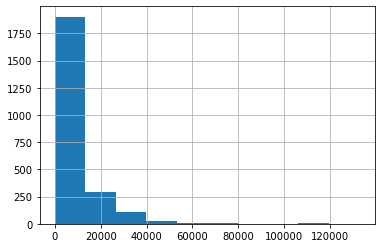

In [30]:
add_data_copy.favorite_count.hist()

In [31]:
Q1 = add_data_copy['favorite_count'].quantile(0.25)
Q3 = add_data_copy['favorite_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for non-outliers
add_data_copy = add_data_copy[(add_data_copy['favorite_count'] >= lower_bound) & (add_data_copy['favorite_count'] <= upper_bound)]

<AxesSubplot:>

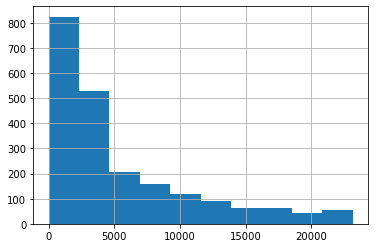

In [32]:
add_data_copy.favorite_count.hist()

Now, we're going to remove the outliers of retweet_count.

<AxesSubplot:>

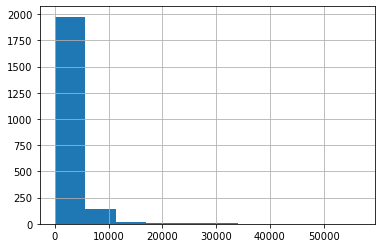

In [33]:
add_data_copy.retweet_count.hist()

In [34]:
Q1 = add_data_copy['retweet_count'].quantile(0.25)
Q3 = add_data_copy['retweet_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

add_data_copy = add_data_copy[(add_data_copy['retweet_count'] >= lower_bound) & (add_data_copy['retweet_count'] <= upper_bound)]

<AxesSubplot:>

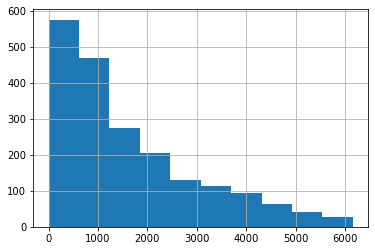

In [35]:
add_data_copy.retweet_count.hist()

#### Test

In [36]:
add_data_copy.describe()

,tweet_id,retweet_count,favorite_count
count,1.995000e+03,1995.000000,1995.000000
mean,7.303291e+17,1618.329825,5094.049123
std,6.208487e+16,1405.448988,5164.209422
min,6.660209e+17,0.000000,0.000000
25%,6.758218e+17,543.000000,1413.500000
50%,7.061665e+17,1161.000000,3238.000000
75%,7.776317e+17,2334.000000,7290.500000
max,8.910880e+17,6159.000000,23177.000000


### Issue #1: Tidiness

#### Define

From weratedogs, dates and hours could be separated. While it may not be considered a critical issue, it's worth noting that separating dates and hours is advisable for a more in-depth analysis of the data, as per the guidelines from weratedogs.

#### Code

In [37]:
weratedogs_copy['date'] = weratedogs_copy['timestamp'].dt.date
weratedogs_copy['hour'] = weratedogs_copy['timestamp'].dt.strftime('%H:%M:%S')

weratedogs_copy = weratedogs_copy[['tweet_id'
                                  ,'timestamp'
                                  ,'date'
                                  ,'hour'
                                  ,'text' 
                                  ,'source'
                                  ,'expanded_urls'
                                  ,'rating_numerator'
                                  ,'rating_denominator'
                                  ,'name']]

#### Test

In [38]:
weratedogs_copy.sample()

,tweet_id,timestamp,date,hour,text,source,expanded_urls,rating_numerator,rating_denominator,name
672,789903600034189313,2016-10-22 18:57:48,2016-10-22,18:57:48,This is Ralphy. His dreams were just shattered...,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy


### Issue #2: Tidiness

#### Define
In add_data, the tweet and the url in the full_text variable should be separated, acording with the display_text_range and replace the text variable of the weratedogs dataframe.
#### Code

In [39]:
weratedogs_copy.drop(columns = ['text']
                    ,inplace = True)

In [40]:
def extract_segment(row):
    start, end = row['display_text_range']
    return row['full_text'][start:end]

# Aplicar la función a lo largo de las filas del DataFrame
add_data_copy['text'] = add_data_copy.apply(extract_segment, axis=1)

#### Test

In [41]:
add_data_copy.reset_index(drop = True, inplace = True)
add_data_copy['text'][10]

'I have a new hero and his name is Howard. 14/10'

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
twitter_archive_master = weratedogs_copy.merge(imagen_pred_copy
                                              ,on = ['tweet_id']).merge(add_data_copy
                                                                       ,on = ['tweet_id'])
twitter_archive_master.to_csv('twitter_archive_master.csv'
                             ,index = False)

In [43]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'date', 'hour', 'source', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'full_text',
       'display_text_range', 'text'],
      dtype='object')

In [44]:
twitter_archive_master.head(3)

,tweet_id,timestamp,date,hour,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text,display_text_range,text
0,891087950875897856,2017-07-29 00:08:17,2017-07-29,00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.116317,True,Indian_elephant,0.076902,False,3261,20562,Here we have a majestic great white breaching ...,"[0, 138]",Here we have a majestic great white breaching ...
1,890971913173991426,2017-07-28 16:27:12,2017-07-28,16:27:12,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.199287,True,ice_lolly,0.193548,False,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...,"[0, 140]",Meet Jax. He enjoys ice cream so much he gets ...
2,889531135344209921,2017-07-24 17:02:04,2017-07-24,17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.013834,True,redbone,0.007958,True,2321,15359,This is Stuart. He's sporting his favorite fan...,"[0, 118]",This is Stuart. He's sporting his favorite fan...


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. According with the information, golden_retriever, Pembroke and Labrador_retriever are the three most common dogs breeds to retweet with the 17.72% of participation.

In [45]:
retweet_sum = twitter_archive_master.groupby('p1')['retweet_count'].sum()

# Calculate total retweet count
total_retweet_count = retweet_sum.sum()

# Calculate percentage participation
percentage_participation = (retweet_sum / total_retweet_count) * 100

# Create a dataframe with retweet sum and percentage participation
result_df = pd.DataFrame({
    'Retweet_Sum': retweet_sum,
    'Percentage_Participation': percentage_participation
})

# Sort the dataframe by Retweet_Sum in descending order and show the top 10
top_10_retweets = result_df.sort_values(by='Retweet_Sum', ascending=False).head(10)
top_10_retweets

,Retweet_Sum,Percentage_Participation
p1,,
golden_retriever,205921,7.781513
Pembroke,143397,5.418804
Labrador_retriever,119588,4.519090
Chihuahua,75642,2.858422
chow,69341,2.620315
pug,57012,2.154416
malamute,55592,2.100756
toy_poodle,50869,1.922280
Samoyed,50528,1.909394


2. Golden_retriever, Pembroke and Labrador_retriever are the three most common dogs breeds to favorite too with the 18.36% of participation.

In [46]:
favorite_sum = twitter_archive_master.groupby('p1')['favorite_count'].sum()

total_favorite_count = favorite_sum.sum()
percentage_participation = (favorite_sum / total_favorite_count) * 100
result_df = pd.DataFrame({'favorite_sum': favorite_sum
                         ,'Percentage_Participation': percentage_participation})
top_10_retweets = result_df.sort_values(by = 'favorite_sum'
                                       , ascending = False).head(10)
top_10_retweets

,favorite_sum,Percentage_Participation
p1,,
golden_retriever,759768,8.313158
Pembroke,497124,5.439384
Labrador_retriever,421773,4.614916
chow,244529,2.675564
Chihuahua,242730,2.655880
malamute,195498,2.139082
German_shepherd,165895,1.815174
pug,162572,1.778815
toy_poodle,160179,1.752631


3. "We have comprehensive information about tweet counts within two specific time ranges: from midnight until 6:20 AM, and from 1:00 PM until midnight. The first range has the most amount of tweets. However, we lack data for the time interval between 7:00 AM and 1:00 PM. One hypothesis suggests that these tweets originate from a very specific geographical location, which could explain the heightened activity during these time frames. Unfortunately, we do not possess geolocation data for the tweets to substantiate this hypothesis.

In [47]:
twitter_archive_master[(twitter_archive_master['hour'] <= '13:00:00') & (twitter_archive_master['hour'] >= '07:00:00')]

,tweet_id,timestamp,date,hour,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text,display_text_range,text


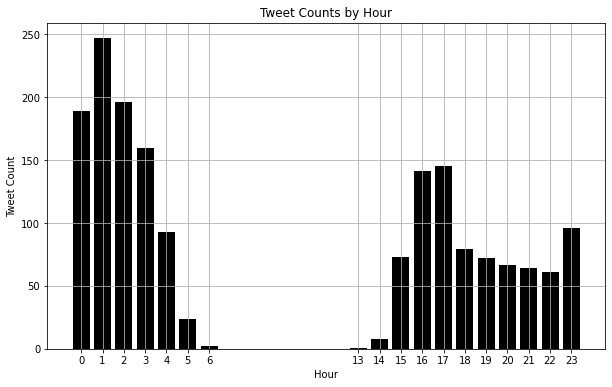

In [48]:
twitter_archive_master['hour_exacly'] = pd.to_datetime(twitter_archive_master['hour'], format='%H:%M:%S').dt.hour
hourly_counts = twitter_archive_master.groupby('hour_exacly').size()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='black')
plt.title('Tweet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Tweet Count')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

### Visualization

Below is a time series depicting the tweet count from the Twitter account @weRateDogs.

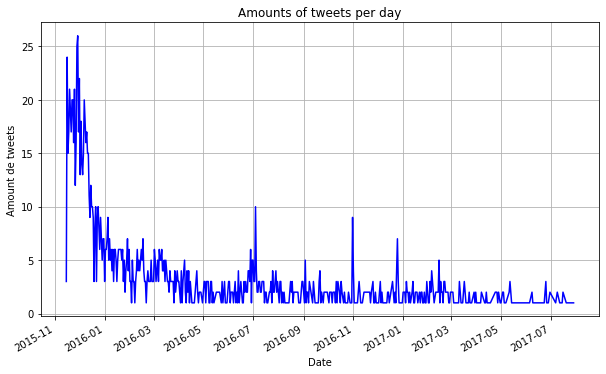

In [49]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# Establece 'timestamp' como el índice
twitter_archive_master.set_index('timestamp', inplace=True)

# Cuenta la cantidad de registros para cada fecha
daily_counts = twitter_archive_master.groupby(twitter_archive_master.index.date).size()

# Convierte el índice de nuevo a un DatetimeIndex
daily_counts.index = pd.to_datetime(daily_counts.index)

# Plot de la serie de tiempo
plt.figure(figsize=(10, 6))
daily_counts.plot(color='blue')
plt.title('Amounts of tweets per day')
plt.xlabel('Date')
plt.ylabel('Amount de tweets')
plt.grid(True)
plt.show()